In [1]:
# This program makes a request to an Elasticsearch API endpoint using a 'where' query and prints the first record in the response payload in json.

In [2]:
# Import dependencies

import requests
import pprint
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define variables

headers = {"Content-Type": "application/json"}

pp = pprint.PrettyPrinter(indent=4)

minutesSince = 10

host = "https://search-lorawan-test-elasticsearch-pjnzn3uxajzeecqr2fberl2pa4.eu-west-1.es.amazonaws.com" # The domain with https:// and trailing slash. For example, https://my-test-domain.us-east-1.es.amazonaws.com/

index = "/ttn-persisted" # the Elasticsearch API index

In [4]:
then = "now" + "-" + str(minutesSince) + "m"

query = {
        "query": {
            "bool": {
                "filter": {
                    "range": {
                        "metadata.time": {
                            "gte": then,
                            "lt":  "now"
                        }
                    }
                }
            }
        }
}

url = host + index + "/_search"

query_str = json.dumps(query)

In [5]:
response = requests.get(url, data=query_str, headers=headers) # requests.get, post, and delete have similar syntax

json_response = json.loads(response.content)

sources = json_response['hits']['hits']

pp.pprint(sources) # prints the response payload as json.

[   {   '_id': '49593594234034038007996661695095388135417111098211434498.0',
        '_index': 'ttn-persisted',
        '_score': 0.0,
        '_source': {   'app_id': 'aws_iot',
                       'counter': 11509,
                       'dev_id': 'a81758fffe03220f',
                       'hardware_serial': 'A81758FFFE03220F',
                       'metadata': {   'airtime': 1646592000,
                                       'coding_rate': '4/5',
                                       'data_rate': 'SF12BW125',
                                       'frequency': 868.1,
                                       'gateways': [   {   'altitude': 57,
                                                           'channel': 0,
                                                           'gtw_id': 'eui-0000024b080503d6',
                                                           'latitude': 51.52858,
                                                           'longitude': -0.12687,
              

In [6]:
temperatures = pd.DataFrame(data=None, columns=['temperature', 'time'])

for source in range(len(sources)):
    keys = sources[source]['_source']['payload_fields'].keys()
    if 'temperature' in keys:
        temperatures.at[source,['temperature']] = sources[source]['_source']['payload_fields']['temperature']
        temperatures.at[source,['time']] = sources[source]['_source']['metadata']['time']
print(temperatures)

  temperature                            time
0        22.8  2019-04-25T15:20:28.025995242Z
1        23.4  2019-04-25T15:20:53.032029864Z
2        23.9  2019-04-25T15:21:55.810526805Z
3        23.5  2019-04-25T15:22:02.714900384Z
4        23.4  2019-04-25T15:22:59.786169748Z
5        23.1  2019-04-25T15:23:28.486444835Z
6        21.7  2019-04-25T15:20:37.808471729Z
7        24.6   2019-04-25T15:22:04.11278877Z
8        21.7  2019-04-25T15:21:03.524952253Z
9        24.9  2019-04-25T15:21:04.953701621Z


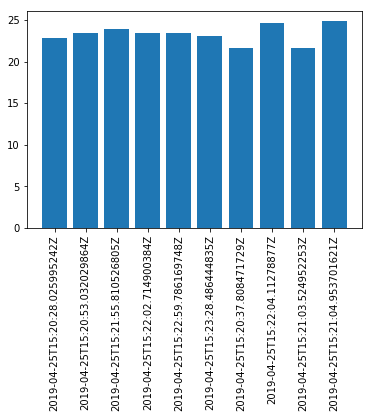

In [7]:
plt.bar(range(len(temperatures['time'])),temperatures['temperature'])
plt.xticks(range(len(temperatures['time'])), temperatures['time'], rotation='vertical')
plt.show()